# Graded Assignment 4 : CNNs

Using Keras in VGG16 And CIFAR.ipynb

In [0]:
import os
import datetime
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [0]:
from keras import optimizers
from keras.layers import *
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, Callback, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

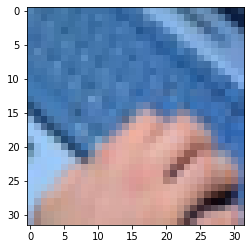

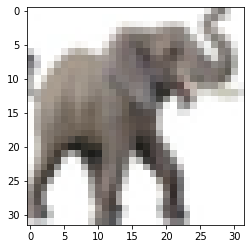

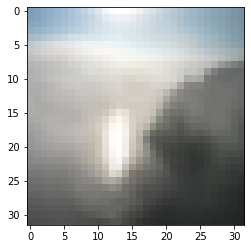

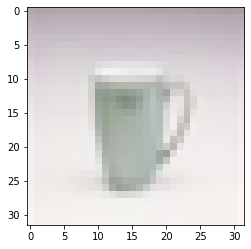

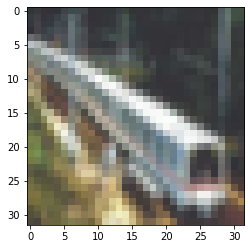

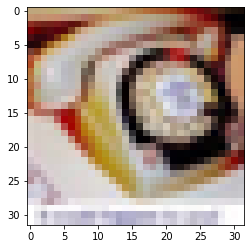

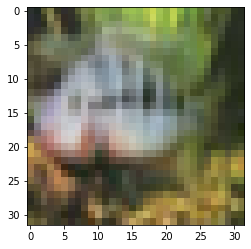

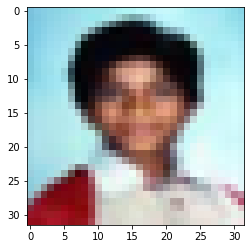

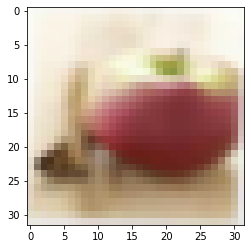

In [7]:
# Before preprocessing the dataset with VGG16 network, checking the data
for i in range(10,1,-1):
    img = x_train[i].reshape(32,32,3)
    plt.imshow(img)
    plt.show()

Normalize inputs for zero mean and unit variance

In [0]:
def normalize(x_train,x_test):
        mean = np.mean(x_train,axis=(0,1,2,3))
        std = np.std(x_train, axis=(0, 1, 2, 3))
        x_train = (x_train-mean)/(std+1e-7)
        x_test = (x_test-mean)/(std+1e-7)
        return x_train, x_test

In [0]:
x_train, x_test = normalize(x_train, x_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



In [0]:
target_classes = 100

y_train = to_categorical(y_train, target_classes)
y_test = to_categorical(y_test, target_classes)

In [0]:
def LearningRateSchedulerOptimser(epoch):
  return learning_rate * (0.5 ** (epoch // lr_drop))

reduce_lr = LearningRateScheduler(LearningRateSchedulerOptimser)

In [0]:
datagen = ImageDataGenerator()
datagen.fit(x_train)

In [0]:
weight_decay = 0.0005
input_shape = (32,32,3)
batch_size = 128
epochs = 10

In [23]:
# Trying to set different rates. Best seems to be 0.1
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20
print('test')

test


In [0]:
class VGG16:
      def build(self):

          model = keras.models.Sequential()

          model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape, kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.3))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))


          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))

          model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))


          model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())
          model.add(Dropout(0.4))

          model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(MaxPooling2D(pool_size=(2, 2)))
          model.add(Dropout(0.5))

          model.add(Flatten())
          model.add(Dense(512,kernel_regularizer=l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(BatchNormalization())

          model.add(Dropout(0.5))
          model.add(Dense(target_classes))
          model.add(Activation('softmax'))
          return model

In [0]:
model=VGG16().build()

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 64)       

Visualize and export the model's summary image as a png file

In [0]:
# keras.utils.plot_model(model, "vgg16.png", show_shapes=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True), metrics=['accuracy'])

In [0]:
early_stop = EarlyStopping(monitor='accuracy', patience=5, mode='max')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks_list = [tensorboard_callback, reduce_lr]

In [30]:
history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),callbacks=callbacks_list)

Epoch 1/10
  5/390 [..............................] - ETA: 4:58 - loss: 8.1756 - accuracy: 0.0078

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.358868). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


390/390 [==============================] - 26s 66ms/step - loss: 14.0050 - accuracy: 0.0257 - val_loss: 10.7668 - val_accuracy: 0.0245
Epoch 2/10
390/390 [==============================] - 22s 56ms/step - loss: 8.6205 - accuracy: 0.0437 - val_loss: 7.4671 - val_accuracy: 0.0248
Epoch 3/10
390/390 [==============================] - 22s 55ms/step - loss: 6.1705 - accuracy: 0.0613 - val_loss: 5.8294 - val_accuracy: 0.0376
Epoch 4/10
390/390 [==============================] - 22s 55ms/step - loss: 5.0203 - accuracy: 0.0783 - val_loss: 4.8963 - val_accuracy: 0.0610
Epoch 5/10
390/390 [==============================] - 22s 56ms/step - loss: 4.4286 - accuracy: 0.0985 - val_loss: 4.7518 - val_accuracy: 0.0809
Epoch 6/10
390/390 [==============================] - 22s 55ms/step - loss: 4.1391 - accuracy: 0.1173 - val_loss: 4.1248 - val_accuracy: 0.1133
Epoch 7/10
390/390 [==============================] - 22s 55ms/step - loss: 3.9468 - accuracy: 0.1439 - val_loss: 4.0045 - val_accuracy: 0.1465
E

# Test Loss and Accuracy:

In [31]:
score = model.evaluate(x_test,y_test)
print("Test Loss: ",score[0])
print("Test Accuracy: ",score[1])

10000/10000 [==============================] - 4s 374us/step
Test Loss:  3.7273804901123047
Test Accuracy:  0.21770000457763672
